In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
"""Load files"""
_df = pd.read_csv("./example_rewards.csv")
_df

,episode,steps,avg_reward,avg_loss,avg_td_error,capital,sma_reward,updated
0,0,72,5.597190,2.990076,66.517944,11983.864533,NaN,True
1,1,144,3.614438,3.100735,69.252842,10304.667344,NaN,False
2,2,216,10.643592,3.097462,88.152181,30605.668349,NaN,False
3,3,288,12.314286,3.098976,99.010322,25776.025458,NaN,False
4,4,360,14.491986,3.069911,97.320170,32566.413419,NaN,False
...,...,...,...,...,...,...,...,...
1495,1495,107712,43.569485,2.624803,732.946126,88243.972313,0.0,False
1496,1496,107784,47.175401,2.545795,743.262858,118951.359516,0.0,False
1497,1497,107856,48.200297,2.528466,745.288683,136735.392683,0.0,False
1498,1498,107928,47.698079,2.552561,745.041721,128740.699094,0.0,False


In [128]:
"""Clean up names and data etc"""
df = _df.copy()
df['steps'] = df['steps'] / 1000
df['episode'] = df['episode'] / 1000

In [131]:

def _plot(data_name, data_label, title_prefix, file_name, colors, show_zero):
    df[f'{data_name} SMA'] = df[data_name].rolling(window=10).mean()
    ax1 = df.plot(x='steps',y=[data_name, f'{data_name} SMA'], figsize=(5, 5), label=[data_label, f'{data_label} SMA'])
    ax1.set_xlabel('Step \u00D7 10³', fontsize=14)
    ax2 = ax1.twiny()
    # Move twinned axis ticks and label from top to bottom
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("axes", -0.2))
    
    df.plot(x='episode',y=[data_name, f'{data_name} SMA'], ax=ax2, color=colors, label=[data_label, f'{data_label} SMA'])
    if show_zero:
        plt.axhline(y=0, color='grey', alpha=0.8)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.set_xlabel('Episode \u00D7 10³', fontsize=14)
    ax2.ticklabel_format(useMathText=True)
    ax2.set_title(f'{title_prefix} during Training', fontsize=18)
    plt.tight_layout()
    plt.savefig(f"./graphs/{file_name}")
    #plt.show()

def plot_capital():
    data_name = 'capital'
    data_label = 'Capital'
    title_prefix = 'Capital'
    file_name = 'example_capital.png'
    colors = ['purple', 'magenta']
    _plot(data_name, data_label, title_prefix, file_name, colors, True)

def plot_Q_value():
    data_name = 'avg_td_error'
    data_label = 'Q-Value'
    title_prefix = 'Q-Values'
    file_name = 'example_Q-values.png'
    colors = ['blue', 'cyan']
    _plot(data_name, data_label, title_prefix, file_name, colors, False)

def plot_loss():
    data_name = 'avg_loss'
    data_label = 'Loss'
    title_prefix = 'Loss'
    file_name = 'example_loss.png'
    colors = ['goldenrod', 'gold']
    _plot(data_name, data_label, title_prefix, file_name, colors, False)

def plot_reward():
    data_name = 'avg_reward'
    data_label = 'Reward'
    title_prefix = 'Reward'
    file_name = 'example_rewards.png'
    colors = ['green', 'lightgreen']
    _plot(data_name, data_label, title_prefix, file_name, colors, False)
    

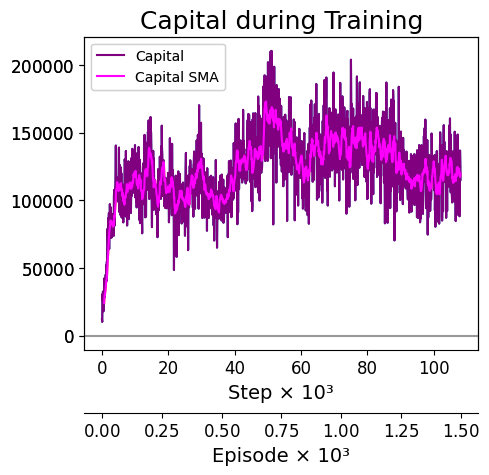

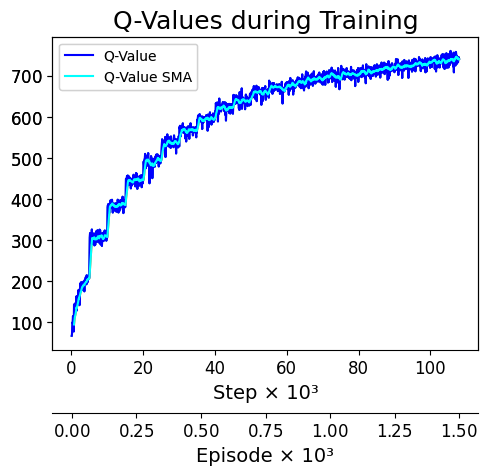

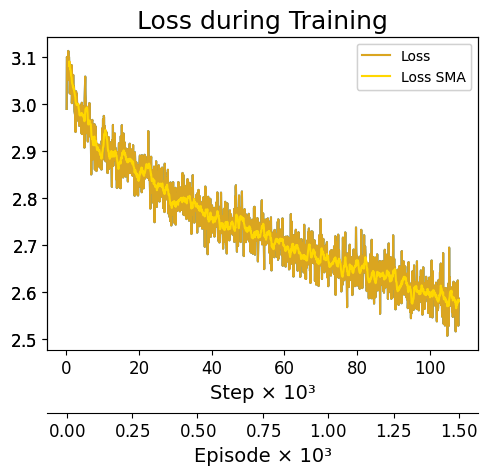

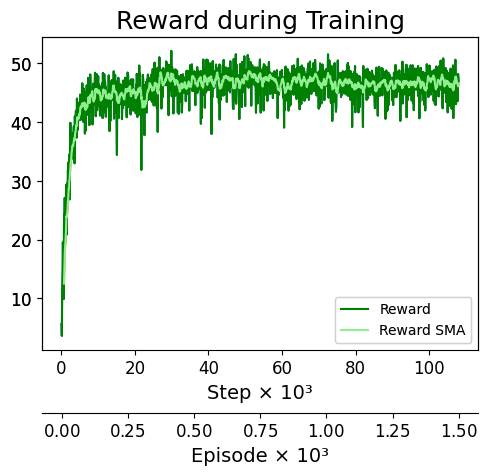

In [133]:
plot_capital()
plot_Q_value()
plot_loss()
plot_reward()